In [1]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 로지스틱 회귀
: 선형방정식을 사용해서 회귀란 단어가 있지만 실제적으로 분류(Classification)에 대한 확률을 계산하는 모델

In [2]:
fish = pd.read_csv('../Data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Feature와 Target

In [4]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [5]:
# Target
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

# Train, Test

In [6]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 표준화

In [7]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
### KNN을 이용한 확률 예측

In [8]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print('train score :', kn.score(train_scaled, train_target))
print('test score :', kn.score(test_scaled, test_target))

train score : 0.8907563025210085
test score : 0.85


In [9]:
# test data로 예측
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [10]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [11]:
# test의 확률 예측값 보기
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4) # 소수점 이하 4자리

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [12]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

---
## 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델
- 선형회귀식에서 출발하였고 딥러닝 모델의 기반임.

z = a*Weight + b*Length + c*Diagonal + d*Width + e*Height + f</br>
위의 식을 이용하면 나오는 결과값은 -무한대~+무한대의 범위로 결과 값이 출력된다.</br>
이를 해결하는 방법이 Sigmoid 함수를 사용한다.</br>

Sigmoid함수는 결과값이 0~1사이의 수만 출력하므로 0.5를 기준으로 양성(True)과 음성(False)로 분류가 가능하다.</br>
로지스틱 회귀를 사용할 경우는 Sigmoid함수를 로지스틱 함수라고 표현 한다.

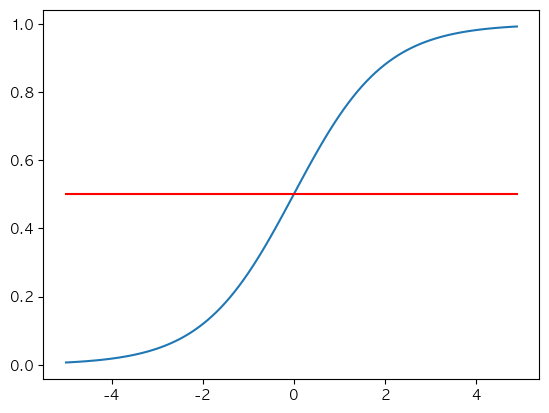

In [13]:
# Sigmoid Graph 출력하기
z = np.arange(-5, 5, 0.1)
y = np.full((100,1),0.5) # 양성과 음성의 기준점
phi = 1 / (1+np.exp(-z))

plt.plot(z, phi)
plt.plot(z, y, c='red')
plt.show()

---
### 로지스틱 회귀로 이진 분류 수행하기

In [14]:
# 2종류의 데이터만 발췌하기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [15]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [16]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [17]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

---
### 확률 분포 검증

In [18]:
# 클래스 종류
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [19]:
# 회귀식의 기울기(가중치) 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [20]:
# 다중식으로 계산
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [21]:
# Sigmoid 함수에 대입하여 확률값을 구한다.
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


---
### 로지스틱 회귀로 다중 분류 수행하기

In [22]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print('Train :', lr.score(train_scaled, train_target))
print('Test :', lr.score(test_scaled, test_target))

Train : 0.9327731092436975
Test : 0.925


In [23]:
# test data 예측
lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.667, 0.   , 0.333, 0.   , 0.   ],
       [0.   , 0.   , 0.667, 0.   , 0.333, 0.   , 0.   ]])

In [24]:
# 사용된 다중 공식 확인
print(lr.coef_, lr.intercept_)

[[-1.49002391 -1.02914546  2.59346952  7.70356904 -1.20069621]
 [ 0.19618433 -2.01066304 -3.77978384  6.50491084 -1.99483724]
 [ 3.56279446  6.34358274 -8.48971741 -5.75757091  3.79307809]
 [-0.10458082  3.60318722  3.93067712 -3.61735104 -1.75069837]
 [-1.40060956 -6.07503913  5.25968948 -0.87220842  1.86043583]
 [-1.38526622  1.49215352  1.39226801 -5.67733697 -4.40097069]
 [ 0.62150172 -2.32407585 -0.90660287  1.71598745  3.69368859]] [-0.09205115 -0.26290895  3.25101321 -0.14743216  2.65497795 -6.78782044
  1.38422153]


---
### 확률 분포 검증

In [25]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

계산할 항목이 여러개 이므로 이를 Sigmoid를 사용하면 각자의 값이 생성되어 확률이 1이 넘는 경우가 발생한다.</br>
다중 항목인 경우에는 Softmax를 사용한다.

In [26]:
proba = softmax(decisions, axis=1)
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])